In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# load the datasets
df=pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.shape

(101, 18)

In [4]:
df.isna().any().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.nunique()

animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

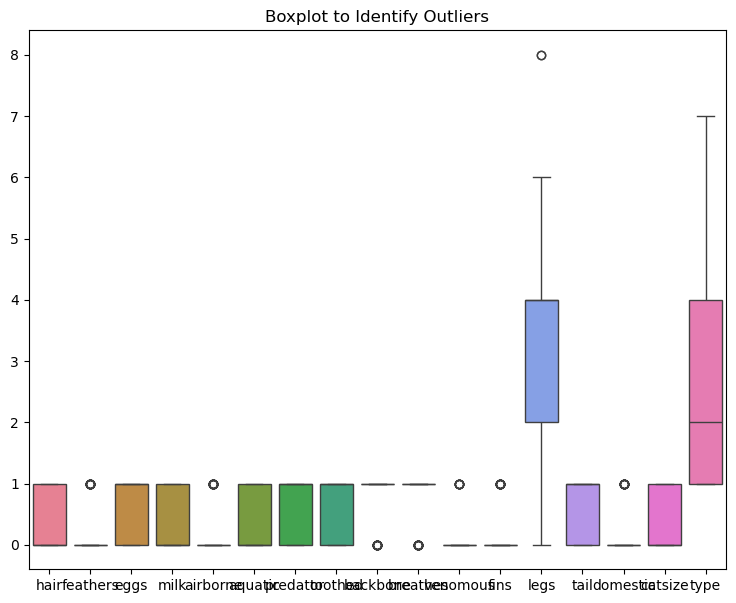

In [8]:
# Plot boxplot
plt.figure(figsize=(9, 7))
sns.boxplot(data=df)
plt.title("Boxplot to Identify Outliers")
plt.show()

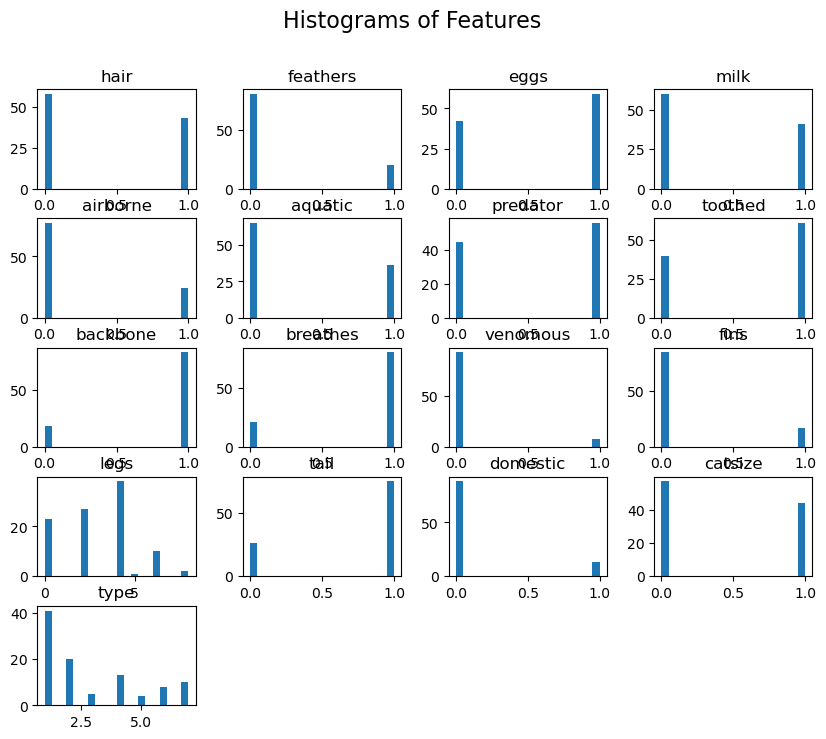

In [9]:
# Plot histograms for all numeric columns
df.hist(bins=20, figsize=(10, 8), grid=False)
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

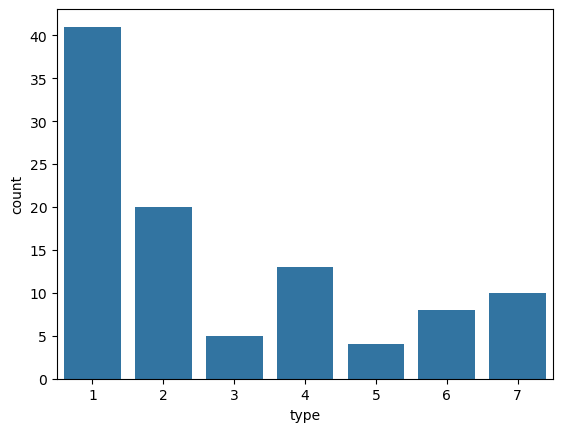

In [10]:
# Visualize data distribution
sns.countplot(x='type', data=df)
plt.show()


In [11]:
# Encode categorical variables 
le = LabelEncoder()
df['animal name'] = le.fit_transform(df['animal name'])
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
#split the data into train and test
X=df.iloc[:,:17]
y=df.iloc[:,17]
X.shape,y.shape

((101, 17), (101,))

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.70884021,  1.16139451, -0.49690399, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [-1.67414817,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-1.63945614, -0.86103386, -0.49690399, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.65628693,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [ 1.69097896, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.725671  , -0.86103386,  2.01246118, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((80, 17), (21, 17), (80,), (21,))

In [16]:
#Train the KNN Classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

#prediction
y_pred=knn.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
print(f"Precision: {precision:.2f}")

# Recall
recall= recall_score(y_test, y_pred, average='macro', zero_division=1)
print(f"Recall: {recall:.2f}")

# F1-Score
f1= f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.52
Precision: 0.67
Recall: 0.31
F1-Score: 0.18


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
#hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)



Best parameters: {'metric': 'cosine', 'n_neighbors': 1}
Best cross-validation accuracy: 0.9


In [19]:

knn = KNeighborsClassifier(n_neighbors=1, metric='cosine')
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
print(f"Precision: {precision:.2f}")

# Recall
recall= recall_score(y_test, y_pred, average='macro', zero_division=1)
print(f"Recall: {recall:.2f}")

# F1-Score
f1= f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.90
Recall: 0.75
F1-Score: 0.74


In [20]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

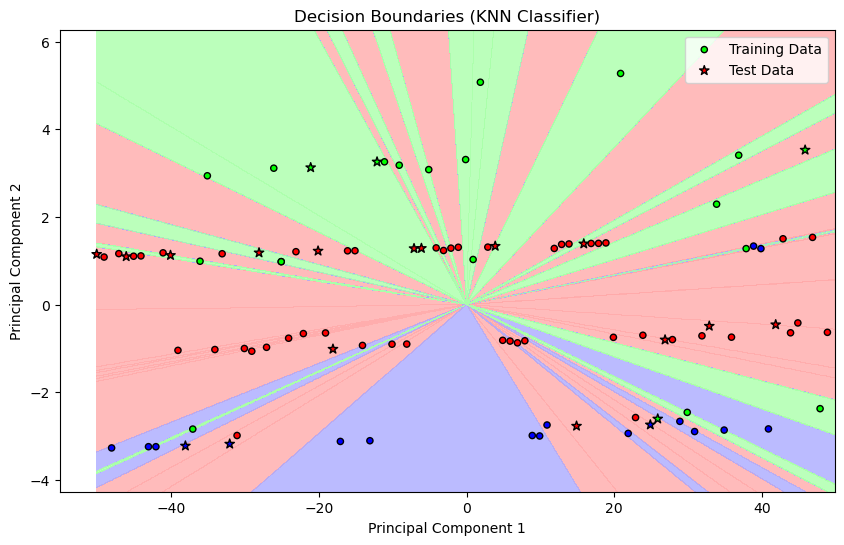

In [21]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

#Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

#Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1, metric='cosine')  
knn.fit(X_train_2d, y_train)

#Create a meshgrid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#Predict on the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and training points
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Training Data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='*', label='Test Data')
plt.title("Decision Boundaries (KNN Classifier)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [22]:
#done